In [2]:
%matplotlib inline                  
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import numpy as np
from numpy import *
import time
import matplotlib.cm as cm
plt.rcParams.update({'font.size': 18})
from mpl_toolkits.axes_grid1 import make_axes_locatable

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

def plotit(xin,yin,y2in,vin,start,end,xname,vname,titlename,savename,maxor,border = False,dots = True,both = True):    
    colormap = 'viridis'   #viridis
    value = 0.05
    xdots = xin[start:end]#np.sqrt(2*meandrot)#
    ydots = yin[start:end]
    y2dots = y2in[start:end]
    vdots = vin[start:end]
    count = 0; x = []; x.append(xdots[0])
    count2 = 0; y = []; y.append(ydots[0]); y2 = []; y2.append(y2dots[0])
    for i in range(len(xdots)):
        if xdots[i] > x[count]:
            x.append(xdots[i])
            count +=1
        if ydots[i] > y[count2]:
            y.append(ydots[i])
            y2.append(y2dots[i])
            count2 +=1
    xlength = len(x); ylength = len(y)
    z = np.zeros((ylength,xlength)); count = 0
    for i in range(xlength):
        for j in range(ylength):
            if count < num:
                z[j,i] = vdots[count]
                count += 1
            if count > num: z[j,i] = np.nan
    if dots == True: 
        if both == True: fig, ax1 = plt.subplots(figsize=(9,7))
        else: fig, ax1 = plt.subplots(figsize=(8,7))
    else: fig, ax1 = plt.subplots(figsize=(8,7))
    ax = plt.subplot(111)
    plt.title(titlename)
    if both == True: im = ax.contourf(x,y,z,cmap=colormap,alpha=0.4)
    else: im = ax.contourf(x,y,z,cmap=colormap,alpha=0.6)
    im = ax.contour(x,y,z,cmap='gray')
    ax.set_xlabel(xname)#
    ax.set_ylabel('Delay $\delta t$ [s]')
    ax.tick_params(axis='y')
    if border == True:
        ax.set_ylim([(1-value)*min(y),(1+value)*max(y)])
        ax.set_xlim([(1-value)*min(x),(1+value)*max(x)])
    if dots == True:
        im = ax.scatter(xdots,ydots,c=vdots,linewidths=5,marker='o',cmap=colormap)
        if border == False:
            ax.set_ylim([min(ydots),max(ydots)])
            ax.set_xlim([min(xdots),max(xdots)])
        else:
            ax.set_ylim([(1-value)*min(y2ots),(1+value)*max(ydots)])
            ax.set_xlim([(1-value)*min(xdots),(1+value)*max(xdots)])
    if both == True:
        ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
        im2 = ax2.contourf(x,y2,z,cmap=colormap,alpha=0.4)
        im2 = ax2.contour(x,y2,z,cmap='gray')
        ax2.set_ylabel('Delay N [frames]')  # we already handled the x-label with ax1
        ax2.tick_params(axis='y')
        if border == True:
            ax2.set_ylim([(1-value)*min(y2),(1+value)*max(y2)])
            ax2.set_xlim([(1-value)*min(x),(1+value)*max(x)])       
        pad1 = 1      
        divider2 = make_axes_locatable(ax2)
        cax2 = divider2.append_axes("right", size="5%", pad=1)
        plt.colorbar(im, cax=cax2)
    else: pad1 = 0.5        
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=pad1)
    plt.colorbar(im, cax=cax)
    plt.ylabel(vname)  
    plt.tight_layout()
    plt.savefig(savename+'.pdf', format='pdf')
    plt.savefig(savename+'.svg', format='svg')
    plt.show()
    for i in range(len(vdots)):
        if maxor == True:
            if vdots[i] == max(vdots[:]): print('delay = ',round(delaywave[i],2),'s - noise = ',round(xdots[i],2),' - max',vname,'= ',round(min(vdots),2))
        else:
            if vdots[i] == min(vdots[:]): print('delay = ',round(delaywave[i],2),'s - noise = ',round(xdots[i],2),' - min',vname,'= ',round(min(vdots),2))

In [3]:
start = '1'
end = '55'
folder = '.'

datageneral = np.loadtxt(r''+str(folder)+'/Angle0/DataGeneral/DataGeneral'+str(start)+'.txt')
dt = datageneral[0]
pxtomum = datageneral[1]
offset = datageneral[2]
videosize = datageneral[3]
boundaryradius = datageneral[4]

R = 2.19e-6/2
T = 273.15+22
kB = 1.38064852e-23
eta=2.414e-5*10**(247.8/(T-140))
D_0 = kB*T/(6*np.pi*eta*R)
iterationtime = 51.9986
programtime = 12.8103745397

In [4]:
folder = './DataImportant'
folder2 = './DataComparerInAndOut'
folder3 = './DataRadial2'
num = int(end)-int(start)+1
delaywave = np.zeros((num,2));anglewave = np.zeros(num)
allimportant = np.zeros((26,num))           #0 - average distance to center; 1 - hits of the boundary

data4 = np.loadtxt(r''+str(folder3)+'/DataRadial'+str(start)+'.txt')
radiallength = len(data4)
radialrows = len(data4[0,:])
dataradial = np.zeros((radiallength,radialrows,num))

for i in range(num):
    file = int(int(start)+i)
    data2 = np.loadtxt(r''+str(folder)+'/DataImportant'+str(file)+'.txt')
    #0 - mean distance to center, 1 - boundary hits, 2 - mean angle change, 3 - countin, 4 - noise, 5 - delay, 
    #6 - reorientation time, 7 - mean of the propability, 8 - sd density, 9/10 - Drot/err, 11/12 - Drotexp/err, 
    #13/14 - ptime/err, 15/16 - plength/err, 17/18 - radialdistmore in/out, 19 vmax, 
    #20 meantime, 21 meanprob, 22 notone, 23 zero 
    data2 = np.asarray(data2)
    allimportant[:25,i] = data2
    
    #0 - Shell, 1 - velocity diff, 2 - drift diff
    data3 = np.loadtxt(r''+str(folder2)+'/DataComparerInAndOut'+str(file)+'.txt')
    data3 = np.asarray(data3)
    allimportant[25,i] = np.nanmax(data3[:,1])
    
    #0 - xpos; 1 - mean v; 2 - std v; 3 - mean v_out; 4 - std v_out; 5 - mean v_in; 6 - std v_in
    #7 - density; 8 - v diff; 9 - v diff std; 10 - Drift; 11 - std Drift; 12 - % inwards; 13 - N*v_in - N * v_out
    data4 = np.loadtxt(r''+str(folder3)+'/DataRadial'+str(file)+'.txt')
    dataradial[:,:,i] = data4

check = 0; i = 1    
while check == 0:
    if allimportant[4,i] != allimportant[4,i-1]:
        change = i
        check = 1
    i += 1
    if i >= num: 
        check = 1
        change = i
delaywave = np.zeros(num)
for i in range(num): delaywave[i] = iterationtime*1e-3*(allimportant[5,i]-1)+dt/2+videosize*1.9176e-6+(1032/27e6+1.9176e-6)*videosize+programtime*1e-3+1e-3*2       
timewave = np.zeros(num)
for i in range(num): timewave[i] = 51e-3*10000*i/(60*60)   
for i in range(num):
    if allimportant[13,i] == 666: allimportant[13,i] = np.nan

#for i in range(num): print('i = ',i+1,' - noise = ',allimportant[4,i],' - delay = ',allimportant[5,i])

allimportant[19,:] = 4.5

/Users/alex/anaconda/lib/python3.5/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


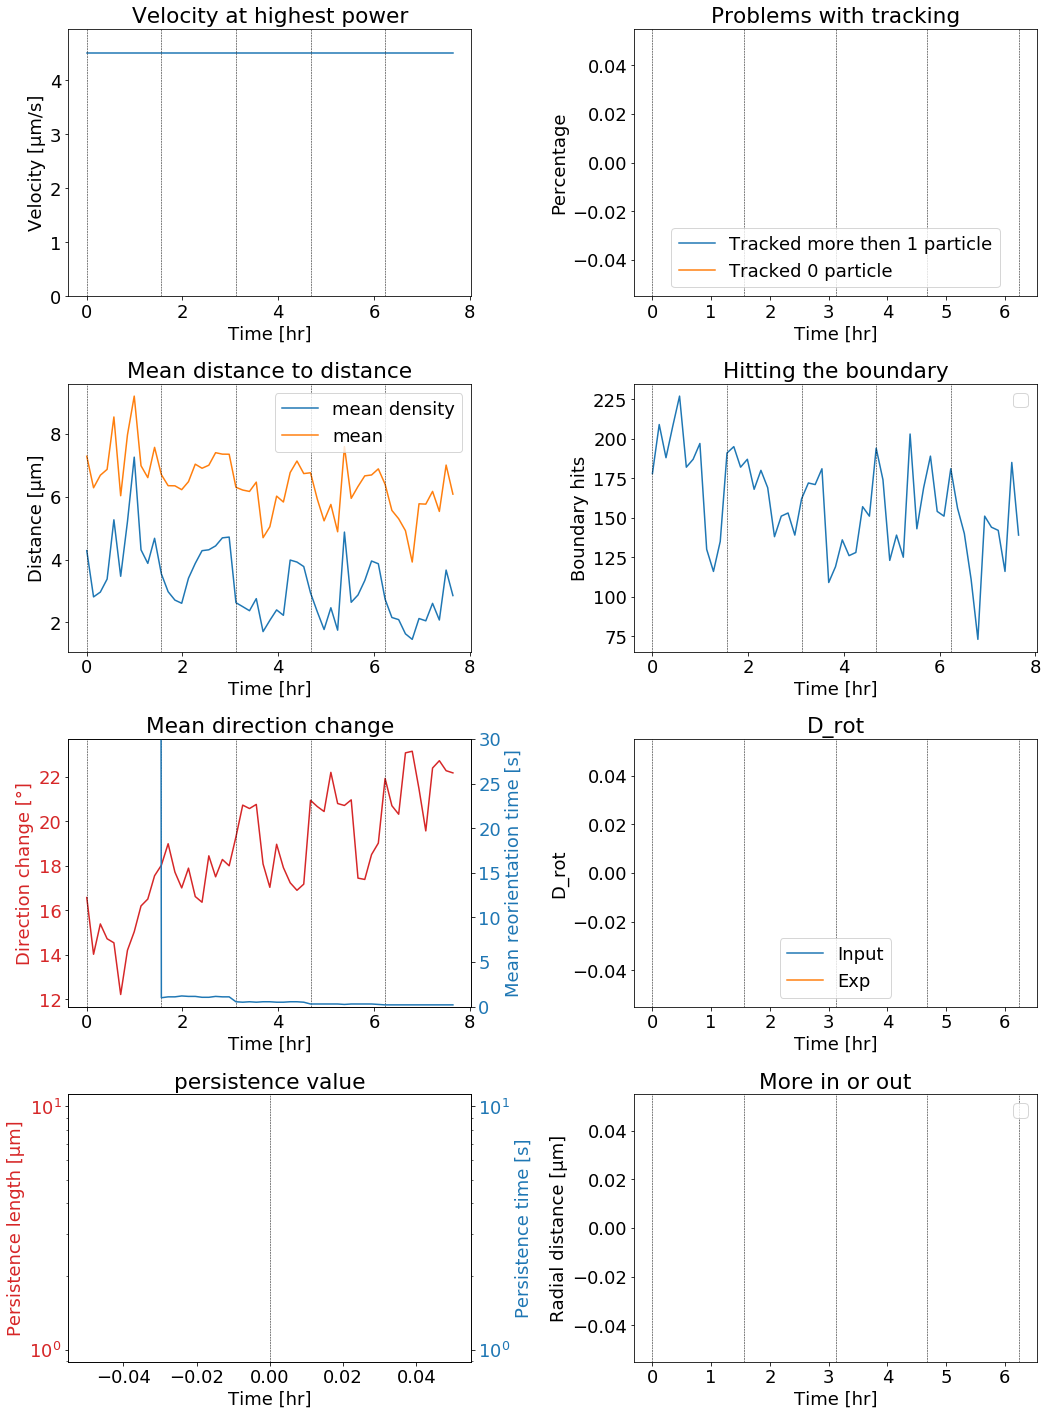

In [5]:
fig=plt.figure(1, figsize = (15,20) )
plt.subplot(4,2,1)
plt.plot(timewave,allimportant[19,:])
for i in range(len(timewave)):
    if i % change == 0:
        plt.axvline(x=timewave[i],linewidth=0.5, color = 'k',linestyle='--')   
plt.title('Velocity at highest power')
plt.xlabel('Time [hr]')
plt.ylabel('Velocity [µm/s]')
plt.ylim([0,1.1*np.nanmax(allimportant[19,:])])

plt.subplot(4,2,2)
plt.plot(timewave,allimportant[20,:]/10000,label='Tracked more then 1 particle')
plt.plot(timewave,allimportant[21,:]/10000,label='Tracked 0 particle')
for i in range(len(timewave)):
    if i % change == 0:
        plt.axvline(x=timewave[i],linewidth=0.5, color = 'k',linestyle='--')
plt.title('Problems with tracking')
plt.xlabel('Time [hr]')
plt.ylabel('Percentage')
plt.legend()

plt.subplot(4,2,3)
plt.plot(timewave,allimportant[7,:],label = 'mean density')  #mean density
plt.plot(timewave,allimportant[0,:],label = 'mean')  #mean 
for i in range(len(timewave)):
    if i % change == 0:
        plt.axvline(x=timewave[i],linewidth=0.5, color = 'k',linestyle='--')
plt.title('Mean distance to distance')
plt.xlabel('Time [hr]')
plt.ylabel('Distance [µm]')
plt.legend()

plt.subplot(4,2,4)
plt.plot(timewave,allimportant[1,:])
for i in range(len(timewave)):
    if i % change == 0:
        plt.axvline(x=timewave[i],linewidth=0.5, color = 'k',linestyle='--')
plt.title('Hitting the boundary')
plt.xlabel('Time [hr]')
plt.ylabel('Boundary hits')
plt.legend()

ax1 = plt.subplot(4,2,5)
color = 'tab:red'
plt.title('Mean direction change')
ax1.set_xlabel('Time [hr]')
ax1.set_ylabel('Direction change [°]', color=color)
ax1.plot(timewave,allimportant[2,:], color=color)   # mean direction change
#ax1.plot(timewave,allimportant[7,:], color ='g')
for i in range(len(timewave)):
    if i % change == 0:
        plt.axvline(x=timewave[i],linewidth=0.5, color = 'k',linestyle='--')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Mean reorientation time [s]', color=color)  # we already handled the x-label with ax1
ax2.plot(timewave,allimportant[6,:], color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.ylim([0,30])

plt.subplot(4,2,6)
plt.plot(timewave,allimportant[9,:],label='Input')
plt.plot(timewave,allimportant[11,:],label='Exp')
for i in range(len(timewave)):
    if i % change == 0:
        plt.axvline(x=timewave[i],linewidth=0.5, color = 'k',linestyle='--')
plt.title('D_rot')
plt.xlabel('Time [hr]')
plt.ylabel('D_rot')
plt.legend()

ax3 = plt.subplot(4,2,7)
color = 'tab:red'
plt.title('persistence value')
ax3.set_xlabel('Time [hr]')
ax3.set_ylabel('Persistence length [µm]', color=color)
ax3.semilogy(timewave,allimportant[15,:], color=color)   #persistence length
for i in range(len(timewave)):
    if i % change == 0:
        plt.axvline(x=timewave[i],linewidth=0.5, color = 'k',linestyle='--')
ax3.tick_params(axis='y', labelcolor=color)

ax4 = ax3.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax4.set_ylabel('Persistence time [s]', color=color)  # we already handled the x-label with ax1
ax4.semilogy(timewave,allimportant[13,:], color=color)
ax4.tick_params(axis='y', labelcolor=color)

plt.subplot(4,2,8)
plt.plot(timewave,allimportant[17,:])
plt.plot(timewave,allimportant[18,:])
for i in range(len(timewave)):
    if i % change == 0:
        plt.axvline(x=timewave[i],linewidth=0.5, color = 'k',linestyle='--')
plt.title('More in or out')
plt.xlabel('Time [hr]')
plt.ylabel('Radial distance [µm]')
plt.legend()

plt.tight_layout()
plt.savefig('Analyze long measurement.pdf', format='pdf')
plt.show()

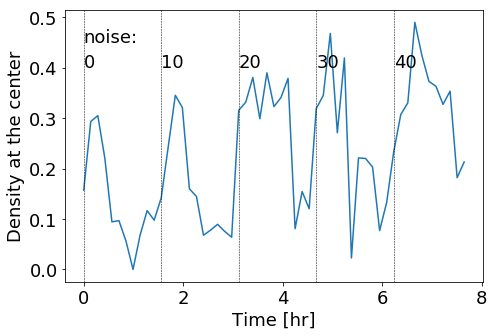

In [6]:
fig=plt.figure(1, figsize = (7.5,5) )
plt.subplot(1,1,1)
#plt.plot(timewave,allimportant[7,:],label = 'mean density')  #mean density
plt.plot(timewave,dataradial[0,7,:],label = 'mean density')  #mean density
#plt.plot(timewave,allimportant[0,:],label = 'mean')  #mean 
printnum = 0
for i in range(len(timewave)):
    if i % change == 0:
        plt.axvline(x=timewave[i],linewidth=0.5, color = 'k',linestyle='--')
        plt.text(timewave[i],0.4,printnum)
        printnum += 10
plt.text(timewave[0],0.45,'noise:')
plt.xlabel('Time [hr]')
plt.ylabel('Density at the center')
#plt.ylabel('Distance [µm]')
#plt.legend()
plt.savefig('Density at the center 2.pdf', format='pdf')
plt.show()

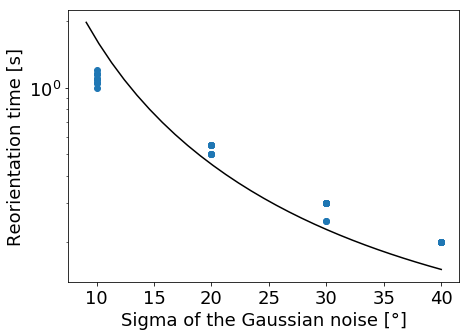

In [7]:
#0 - mean distance to center, 1 - boundary hits, 2 - mean angle change, 3 - countin, 4 - noise, 5 - delay, 
#6 - reorientation time, 7 - mean of the propability, 8 - sd density, 9/10 - Drot/err, 11/12 - Drotexp/err, 
#13/14 - ptime/err, 15/16 - plength/err, 17/18 - radialdistmore in/out, 19 vmax, 
#20 meantime, 21 meanprob, 22 notone, 23 zero 

def reorientationtimefit2(x, A, tau, y0):
    return A*x**(-tau)+y0
    
datarotation = np.linspace(8,40,30)

start = 11
fig=plt.figure(1, figsize = (7,5) )
plt.scatter(allimportant[4,start:],allimportant[6,start:])
plt.plot(datarotation[1:],reorientationtimefit2(datarotation[1:],160,2,0.05),color='k')
plt.yscale('log')
plt.xlabel('Sigma of the Gaussian noise [°]')
plt.ylabel('Reorientation time [s]')
plt.show()

/Users/alex/anaconda/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/Users/alex/anaconda/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/Users/alex/anaconda/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/Users/alex/anaconda/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


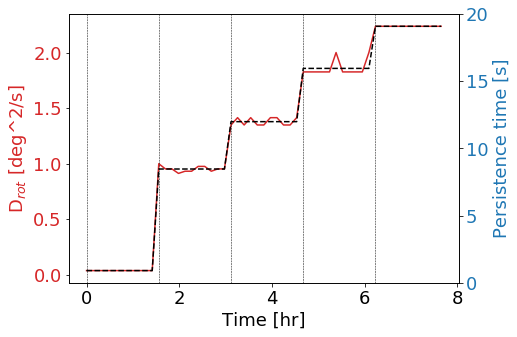

In [8]:
meandrot = np.zeros(num)
number = change
for i in range(9):
    meandrot[i*number:i*number+number] = np.nanmean(np.sqrt(1/allimportant[6,i*number:i*number+number]))

fig=plt.figure(1, figsize = (7.5,5) )
ax1 = plt.subplot(1,1,1)
color = 'tab:red'
#plt.title('Mean direction change')
ax1.set_xlabel('Time [hr]')
ax1.set_ylabel('D$_{rot}$ [deg^2/s]', color=color)
ax1.plot(timewave,np.sqrt(1/allimportant[6,:]), color=color)
#ax1.plot(timewave,allimportant[7,:], color ='g')
for i in range(len(timewave)):
    if i % change == 0:
        plt.axvline(x=timewave[i],linewidth=0.5, color = 'k',linestyle='--')
ax1.tick_params(axis='y', labelcolor=color)
ax1.plot(timewave,meandrot,c='k',linestyle='--')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Persistence time [s]', color=color)  # we already handled the x-label with ax1
ax2.plot(timewave,allimportant[13,:], color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.ylim([0,20])
plt.tight_layout()
plt.savefig('Drot.pdf', format='pdf')
plt.show()

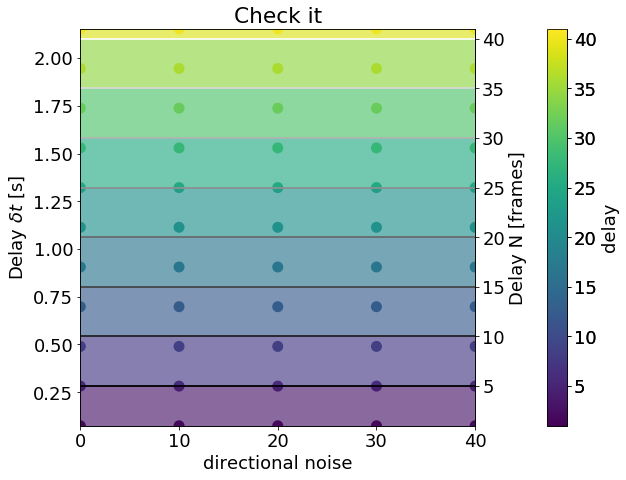

delay =  2.15 s - noise =  0.0  - max delay =  1.0
delay =  2.15 s - noise =  10.0  - max delay =  1.0
delay =  2.15 s - noise =  20.0  - max delay =  1.0
delay =  2.15 s - noise =  30.0  - max delay =  1.0
delay =  2.15 s - noise =  40.0  - max delay =  1.0


In [9]:
ix = allimportant[4,:]
idelayN = delaywave
idelay = allimportant[5,:]
ivin = allimportant[5,:]
istart = 0
iend = num
ixname = str('directional noise')
ivname = str('delay')
ititlename = str('Check it')
isavename = str('Test')
imaxor = True
plotit(ix,idelayN,idelay,ivin,istart,iend,ixname,ivname,ititlename,isavename,imaxor,border = False,dots = True,both = True)   

In [10]:
test = np.zeros(len(allimportant[7,:]))
numb = 11
for i in range(5): test[i*numb:numb**i+numb] = allimportant[7,i*numb:numb**i+numb]/allimportant[7,i*numb]

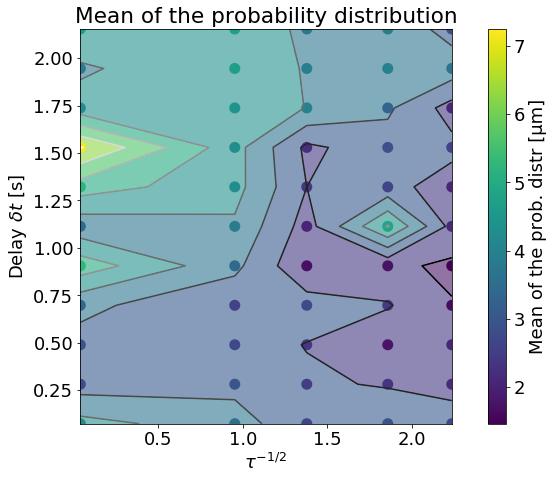

delay =  0.91 s - noise =  2.24  - min Mean of the prob. distr [µm] =  1.46


In [29]:
ix = meandrot#allimportant[4,start:end]#
idelayN = delaywave
idelay = allimportant[5,:]
ivin = allimportant[7,:]#test#
istart = 0
iend = num
ixname = str(r'$\tau^{-1/2}$ ')
ivname = str('Mean of the prob. distr [µm]')
ititlename = str('Mean of the probability distribution')
isavename = str('Meanprobdistr')
imaxor = False
plotit(ix,idelayN,idelay,ivin,istart,iend,ixname,ivname,ititlename,isavename,imaxor,border = False,dots = True,both = False)   

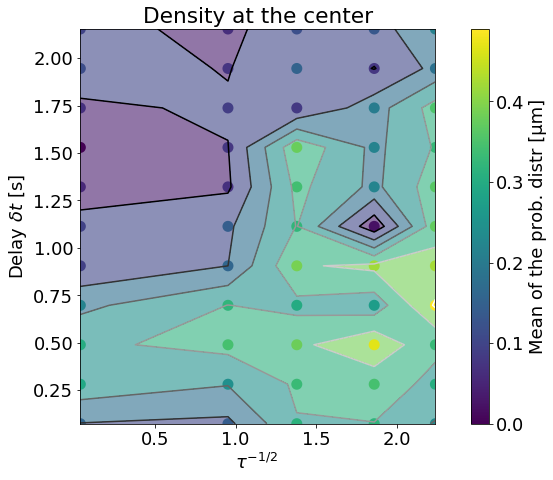

delay =  1.53 s - noise =  0.04  - min Mean of the prob. distr [µm] =  0.0


In [49]:
test2 = np.zeros(num)
numb = 11
for i in range(5): test2[i*numb:numb**i+numb] = dataradial[0,7,i*numb:numb**i+numb]/dataradial[0,7,i*numb]

ix = meandrot#allimportant[4,start:end]#
idelayN = delaywave
idelay = allimportant[5,:]
ivin = dataradial[0,7,:]#test2#
istart = 0
iend = num
ixname = str(r'$\tau^{-1/2}$ ')
ivname = str('Mean of the prob. distr [µm]')
ititlename = str('Density at the center')
isavename = str('Density at the center')
imaxor = False
plotit(ix,idelayN,idelay,ivin,istart,iend,ixname,ivname,ititlename,isavename,imaxor,border = False,dots = True,both = False)   

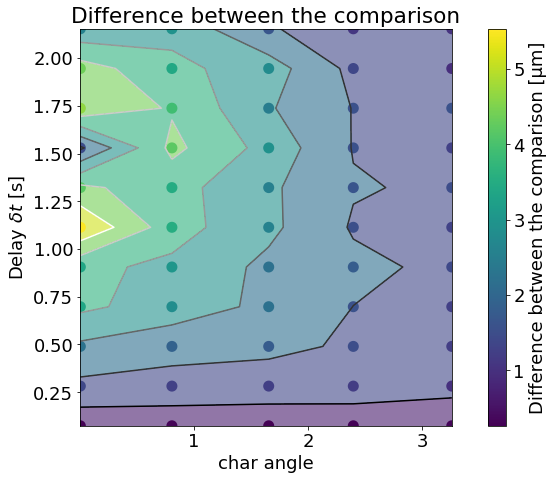

delay =  1.11 s - noise =  0.01  - max Difference between the comparison [µm] =  0.26


In [9]:
ix = meandrot#allimportant[4,start:end]#
idelayN = delaywave
idelay = allimportant[5,:]
ivin = allimportant[18,:] - allimportant[17,:]
istart = 0
iend = num
ixname = str('char angle')
ivname = str('Difference between the comparison [µm]')
ititlename = str('Difference between the comparison')
isavename = str('Diffcompare')
imaxor = True
plotit(ix,idelayN,idelay,ivin,istart,iend,ixname,ivname,ititlename,isavename,imaxor,border = False,dots = True,both = False)   

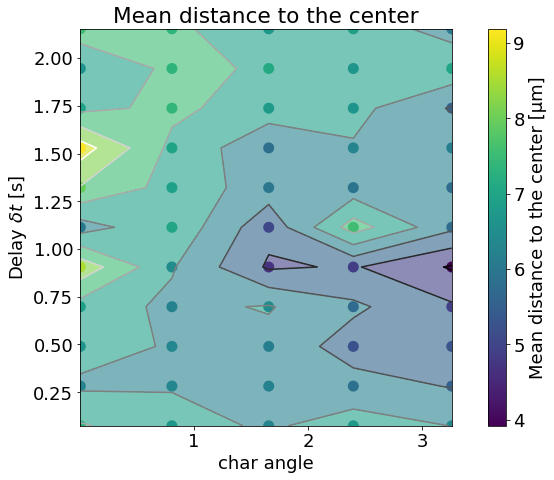

delay =  0.91 s - noise =  3.26  - min Mean distance to the center [µm] =  3.92


In [10]:
ix = meandrot#allimportant[4,start:end]#
idelayN = delaywave
idelay = allimportant[5,:]
ivin = allimportant[0,:]
istart = 0
iend = num
ixname = str('char angle')
ivname = str('Mean distance to the center [µm]')
ititlename = str('Mean distance to the center')
isavename = str('Meandistance')
imaxor = False
plotit(ix,idelayN,idelay,ivin,istart,iend,ixname,ivname,ititlename,isavename,imaxor,border = False,dots = True,both = False)   

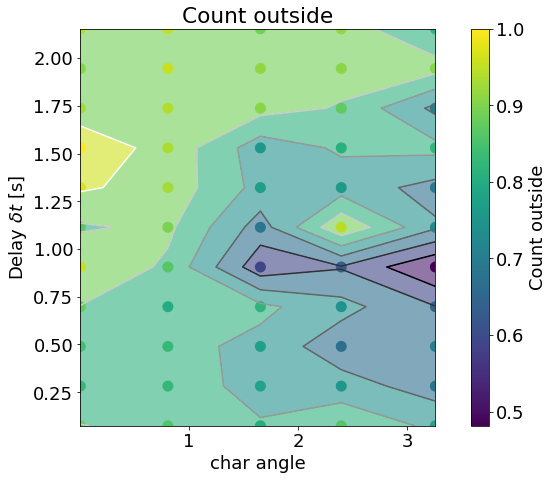

delay =  0.91 s - noise =  3.26  - min Count outside =  0.48


In [11]:
ix = meandrot#allimportant[4,start:end]#
idelayN = delaywave
idelay = allimportant[5,:]
ivin = 1-allimportant[3,:]
istart = 0
iend = num
ixname = str('char angle')
ivname = str('Count outside')
ititlename = str('Count outside')
isavename = str('Count outside')
imaxor = False
plotit(ix,idelayN,idelay,ivin,istart,iend,ixname,ivname,ititlename,isavename,imaxor,border = False,dots = True,both = False)   

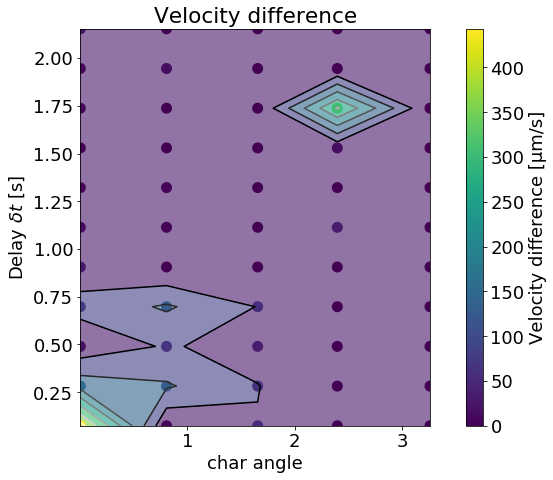

delay =  0.07 s - noise =  0.01  - max Velocity difference [µm/s] =  0.0


In [12]:
ix = meandrot#allimportant[4,start:end]#
idelayN = delaywave
idelay = allimportant[5,:]
ivin = allimportant[23,:]
istart = 0
iend = num
ixname = str('char angle')
ivname = str('Velocity difference [µm/s]')
ititlename = str('Velocity difference')
isavename = str('Velocity difference')
imaxor = True
plotit(ix,idelayN,idelay,ivin,istart,iend,ixname,ivname,ititlename,isavename,imaxor,border = False,dots = True,both = False)   

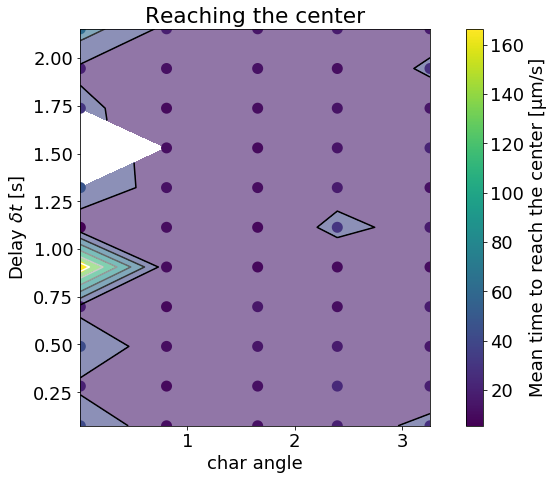

delay =  1.11 s - noise =  0.01  - min Mean time to reach the center [µm/s] =  5.43


In [13]:
ix = meandrot#allimportant[4,start:end]#
idelayN = delaywave
idelay = allimportant[5,:]
ivin = allimportant[20,:]
istart = 0
iend = num
ixname = str('char angle')
ivname = str('Mean time to reach the center [µm/s]')
ititlename = str('Reaching the center')
isavename = str('Time reaching the center')
imaxor = False
plotit(ix,idelayN,idelay,ivin,istart,iend,ixname,ivname,ititlename,isavename,imaxor,border = False,dots = True,both = False)   

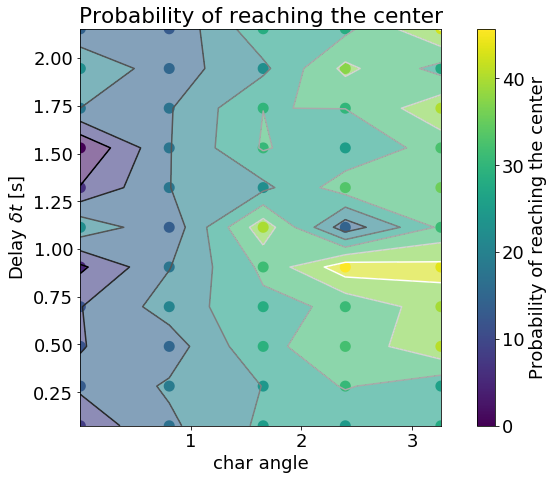

delay =  0.91 s - noise =  2.4  - max Probability of reaching the center =  0.0


In [14]:
ix = meandrot#allimportant[4,start:end]#
idelayN = delaywave
idelay = allimportant[5,:]
ivin = allimportant[21,:]
istart = 0
iend = num
ixname = str('char angle')
ivname = str('Probability of reaching the center')
ititlename = str('Probability of reaching the center')
isavename = str('Probability reaching the center')
imaxor = True
plotit(ix,idelayN,idelay,ivin,istart,iend,ixname,ivname,ititlename,isavename,imaxor,border = False,dots = True,both = False)   

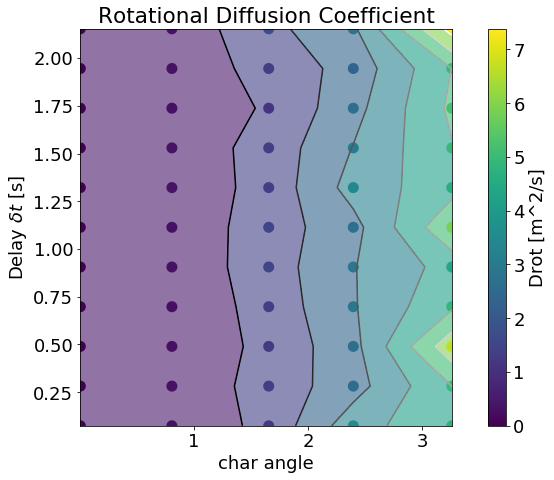

delay =  2.15 s - noise =  3.26  - max Drot [m^2/s] =  0.0


In [15]:
#0 - mean distance to center, 1 - boundary hits, 2 - mean angle change, 3 - countin, 4 - noise, 5 - delay, 
#6 - reorientation time, 7 - mean of the propability, 8 - sd density, 9/10 - Drot/err, 11/12 - Drotexp/err, 
#13/14 - ptime/err, 15/16 - plength/err, 17/18 - radialdistmore in/out - 19 - Vaverage
ix = meandrot#allimportant[4,start:end]#
idelayN = delaywave
idelay = allimportant[5,:]
ivin = allimportant[9,:]
istart = 0
iend = num
ixname = str('char angle')
ivname = str('Drot [m^2/s]')
ititlename = str('Rotational Diffusion Coefficient')
isavename = str('Rotational Diffusion Coefficient')
imaxor = True
plotit(ix,idelayN,idelay,ivin,istart,iend,ixname,ivname,ititlename,isavename,imaxor,border = False,dots = True,both = False)   

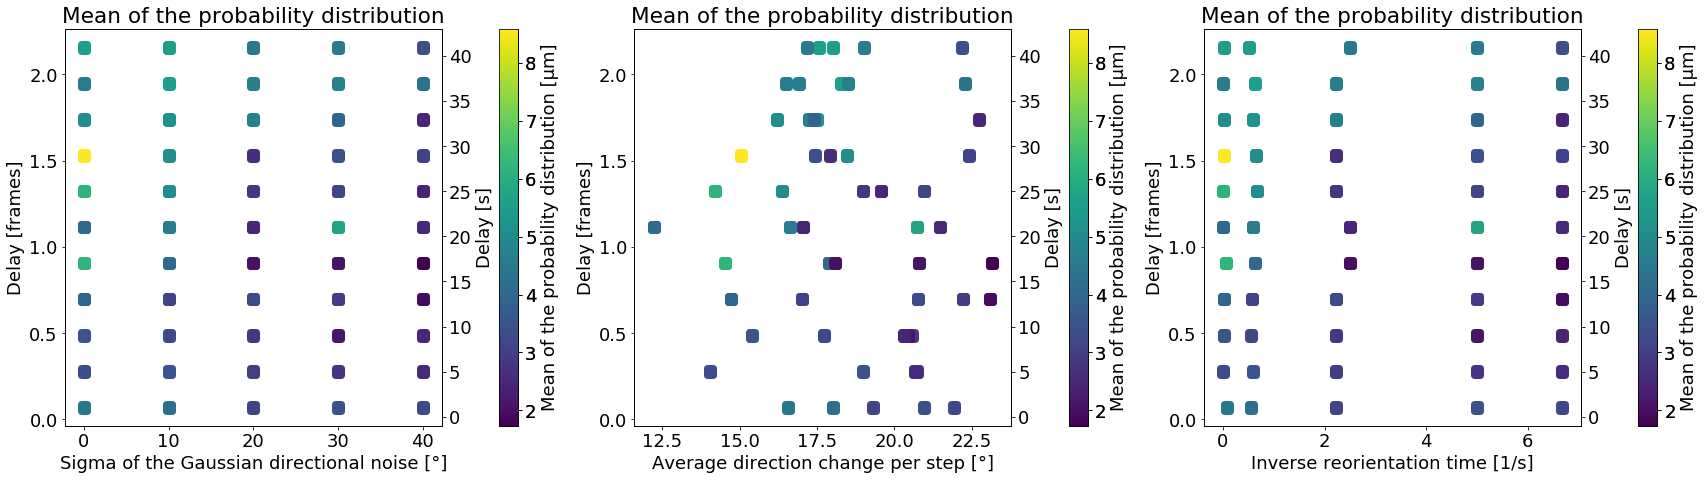

delay =  0.905433912317  - noise =  0.0  - min distance =  0.208932802


In [16]:
start = 0
x1 = allimportant[2,start:]
x2 = allimportant[4,start:]#
x3 = 1/allimportant[6,start:]
y = delaywave[start:]
y2 = allimportant[5,start:]
v = allimportant[7,start:]

xwave = [x2,x1,x3]
fig, ax1 = plt.subplots(figsize=(24,7))
for i in range(3):
    x = xwave[i]
    ax = plt.subplot(1,3,i+1)
    im = ax.scatter(x,y,c=v,linewidths=7,marker='s')
    if i == 0: ax.set_xlabel('Sigma of the Gaussian directional noise [°]')
    if i == 1: ax.set_xlabel('Average direction change per step [°]')
    if i == 2: ax.set_xlabel('Inverse reorientation time [1/s]')
    ax.set_ylabel('Delay [frames]')
    ax.tick_params(axis='y')
    ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
    im2 = ax2.scatter(x,y2,c=v,linewidths=7,marker='s')
    ax2.set_ylabel('Delay [s]')  # we already handled the x-label with ax1
    ax2.tick_params(axis='y')
    plt.title('Mean of the probability distribution')

    divider = make_axes_locatable(ax)
    divider2 = make_axes_locatable(ax2)
    cax = divider.append_axes("right", size="5%", pad=0.8)
    cax2 = divider2.append_axes("right", size="5%", pad=0.8)

    plt.colorbar(im, cax=cax)
    plt.colorbar(im2, cax=cax2)
    plt.ylabel('Mean of the probability distribution [µm]')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('oldMeanprobdist.pdf', format='pdf')
plt.show()

for i in range(num):
    if allimportant[0,i] == min(allimportant[0,:]):        
        print('delay = ',delaywave[i],' - noise = ',anglewave[i],' - min distance = ',min(allimportant[0,:])*pxtomum)

In [32]:
anglenoise = [0,15,20,25,40]
optmeandistdelay = [22,10,16,19,4]
optmeandistvalue = [5.95,4.14,3.5,3.65,4.54]
optvelodiffdelay = [22,16,10,19,4]
optvelodiffvalue = [1.3,0.9,0.71,0.70,0.52]

anglenoise2 = [0,5,10,15,20]
optmeandistdelay2 = [19,3,7,9,25]
optmeandistvalue2 = [6.6,5.57,5.54,5.44,4.46]
optvelodiffdelay2 = [22,17,14,16,8]
optvelodiffvalue2 = [1.47,1.22,0.88,0.61,0.48]

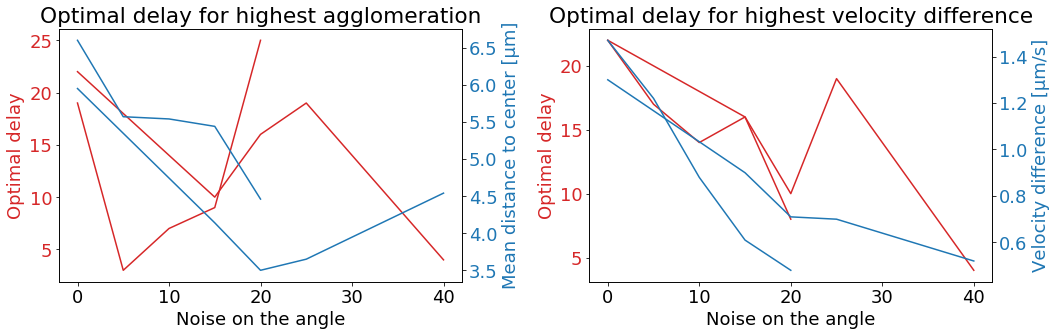

In [33]:
# Create some mock data
fig, ax = plt.subplots(figsize = (15,5))

ax1 = plt.subplot(1,2,1)
color = 'tab:red'
plt.title('Optimal delay for highest agglomeration')
ax1.set_xlabel('Noise on the angle')
ax1.set_ylabel('Optimal delay', color=color)
ax1.plot(anglenoise,optmeandistdelay, color=color, label = '#1')
ax1.plot(anglenoise2,optmeandistdelay2, color=color, label = '#2')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Mean distance to center [µm]', color=color)  # we already handled the x-label with ax1
ax2.plot(anglenoise,optmeandistvalue, color=color, label = '#1')
ax2.plot(anglenoise2,optmeandistvalue2, color=color, label = '#2')
ax2.tick_params(axis='y', labelcolor=color)

ax1 = plt.subplot(1,2,2)
color = 'tab:red'
plt.title('Optimal delay for highest velocity difference')
ax1.set_xlabel('Noise on the angle')
ax1.set_ylabel('Optimal delay', color=color)
ax1.plot(anglenoise,optvelodiffdelay, color=color)
ax1.plot(anglenoise2,optvelodiffdelay2, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Velocity difference [µm/s]', color=color)  # we already handled the x-label with ax1
ax2.plot(anglenoise,optvelodiffvalue, color=color)
ax2.plot(anglenoise2,optvelodiffvalue2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('Optimal delay all.pdf', format='pdf')
plt.show()

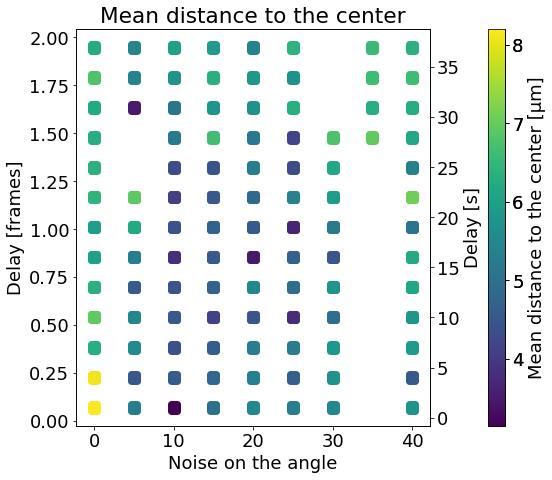

delay =  0.0734563123175  - noise =  0.0  - min distance =  0.1679087514


In [116]:
x = allimportant[4,start:end]
y = delaywave
y2 = allimportant[5,:]
v = allimportant[0,:]

fig, ax1 = plt.subplots(figsize=(8,7))
ax = plt.subplot(111)
im = ax.scatter(x,y,c=v,linewidths=7,marker='s')
ax.set_xlabel('Noise on the angle')
ax.set_ylabel('Delay [frames]')
ax.tick_params(axis='y')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
im2 = ax2.scatter(x,y2,c=v,linewidths=7,marker='s')
ax2.set_ylabel('Delay [s]')  # we already handled the x-label with ax1
ax2.tick_params(axis='y')
plt.title('Mean distance to the center')

divider = make_axes_locatable(ax)
divider2 = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.8)
cax2 = divider2.append_axes("right", size="5%", pad=0.8)

plt.colorbar(im, cax=cax)
plt.colorbar(im2, cax=cax2)
plt.ylabel('Mean distance to the center [µm]')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('Mean distance to the center.pdf', format='pdf')
plt.show()

for i in range(num):
    if allimportant[0,i] == min(allimportant[0,:]):        
        print('delay = ',delaywave[i],' - noise = ',anglewave[i],' - min distance = ',min(allimportant[0,:])*pxtomum)

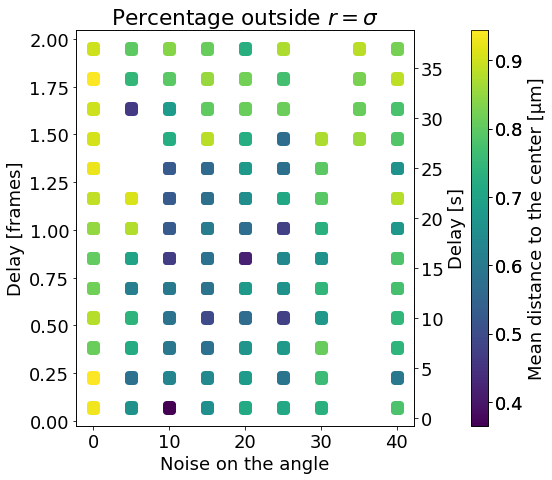

delay =  0.0734563123175  - noise =  0.0  - min percentage =  0.365


In [117]:
x = allimportant[4,start:end]
y = delaywave
y2 = allimportant[5,:]
v = 1-allimportant[3,:]

fig, ax1 = plt.subplots(figsize=(8,7))
ax = plt.subplot(111)
im = ax.scatter(x,y,c=v,linewidths=7,marker='s')
ax.set_xlabel('Noise on the angle')
ax.set_ylabel('Delay [frames]')
ax.tick_params(axis='y')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
im2 = ax2.scatter(x,y2,c=v,linewidths=7,marker='s')
ax2.set_ylabel('Delay [s]')  # we already handled the x-label with ax1
ax2.tick_params(axis='y')
plt.title('Percentage outside $r = \sigma$')

divider = make_axes_locatable(ax)
divider2 = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.8)
cax2 = divider2.append_axes("right", size="5%", pad=0.8)

plt.colorbar(im, cax=cax)
plt.colorbar(im2, cax=cax2)
plt.ylabel('Mean distance to the center [µm]')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('Percentage outside.pdf', format='pdf')
plt.show()

for i in range(num):
    if allimportant[3,i] == max(allimportant[3,:]):        
        print('delay = ',delaywave[i],' - noise = ',anglewave[i],' - min percentage = ',1-max(allimportant[3,:]))

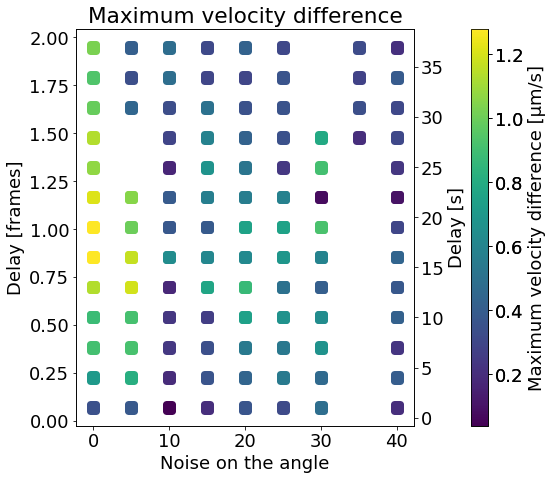

delay =  0.0734563123175  - noise =  0.0  - min percentage =  0.365


In [121]:
x = allimportant[4,start:end]
y = delaywave
y2 = allimportant[5,:]
v = allimportant[23,:]

fig, ax1 = plt.subplots(figsize=(8,7))
ax = plt.subplot(111)
im = ax.scatter(x,y,c=v,linewidths=7,marker='s')
ax.set_xlabel('Noise on the angle')
ax.set_ylabel('Delay [frames]')
ax.tick_params(axis='y')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
im2 = ax2.scatter(x,y2,c=v,linewidths=7,marker='s')
ax2.set_ylabel('Delay [s]')  # we already handled the x-label with ax1
ax2.tick_params(axis='y')
plt.title('Maximum velocity difference')

divider = make_axes_locatable(ax)
divider2 = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.8)
cax2 = divider2.append_axes("right", size="5%", pad=0.8)

plt.colorbar(im, cax=cax)
plt.colorbar(im2, cax=cax2)
plt.ylabel('Maximum velocity difference [µm/s]')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('Vdiff.pdf', format='pdf')
plt.show()

for i in range(num):
    if allimportant[3,i] == max(allimportant[3,:]):        
        print('delay = ',delaywave[i],' - noise = ',anglewave[i],' - min percentage = ',1-max(allimportant[3,:]))

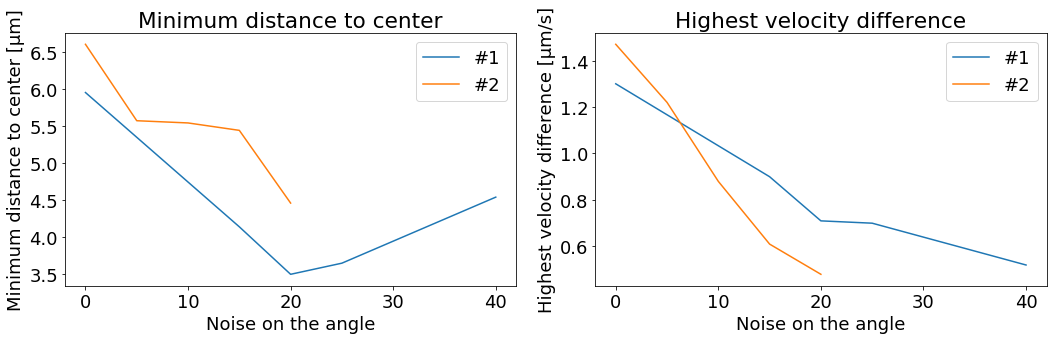

In [37]:
# Create some mock data
fig, ax = plt.subplots(figsize = (15,5))

ax1 = plt.subplot(1,2,1)
plt.plot(anglenoise,optmeandistvalue, label = '#1')
plt.plot(anglenoise2,optmeandistvalue2, label = '#2')
plt.title('Minimum distance to center')
plt.xlabel('Noise on the angle')
plt.ylabel('Minimum distance to center [µm]')
plt.legend()

ax1 = plt.subplot(1,2,2)
plt.plot(anglenoise,optvelodiffvalue, label = '#1')
plt.plot(anglenoise2,optvelodiffvalue2, label = '#2')
plt.title('Highest velocity difference')
plt.xlabel('Noise on the angle')
plt.ylabel('Highest velocity difference [µm/s]')
plt.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('Optimal delay all.pdf', format='pdf')
plt.show()